Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate might just be happier people.

In [30]:
#import necessary libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import os
import warnings 

%matplotlib inline

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

warnings.filterwarnings('ignore')




In [31]:
# import the data using pandas read csv

raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')




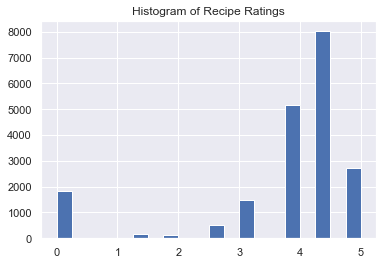

In [32]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [33]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [34]:
#Examine Null and zero values 
nulldf = pd.DataFrame()
nulldf['nulls'] = raw_data.isin([np.nan]).sum()
nulldf['zeros'] = raw_data.isin([0]).sum()
nulldf['%nulls']= raw_data.isnull().sum()*100/raw_data.isnull().count()
nulldf['datatype'] = raw_data.dtypes
nulldf['num_values'] = raw_data.nunique()
nulldf = nulldf.T


nulldf.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,beverly hills,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,bon appétit,bon app��tit,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brooklyn,brown rice,brownie,brunch,brussel sprout,buffalo,buffet,bulgaria,bulgur,burrito,butter,buttermilk,butternut squash,butterscotch/caramel,cabbage,cake,california,calvados,cambridge,campari,camping,canada,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,casserole/gratin,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicago,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,christmas,christmas eve,cilantro,cinco de mayo,cinnamon,citrus,clam,clove,cobbler/crumble,cocktail,cocktail party,coconut,cod,coffee,coffee grinder,cognac/armagnac,collard greens,colorado,columbus,condiment,condiment/spread,connecticut,cook like a diner,cookbook critic,cookie,cookies,coriander,corn,cornmeal,costa mesa,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cr��me de cacao,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,dairy free,dallas,date,deep-fry,denver,dessert,digestif,dill,dinner,dip,diwali,dominican republic,dorie greenspan,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,edible gift,egg,egg nog,eggplant,egypt,emeril lagasse,endive,engagement party,england,entertaining,epi + ushg,epi loves the microwave,escarole,fall,family reunion,fat free,father's day,fennel,feta,fig,fish,flaming hot summer,flat bread,florida,fontina,food processor,fortified wine,fourth of july,france,frangelico,frankenrecipe,freeze/chill,freezer food,friendsgiving,frittata,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,georgia,germany,gin,ginger,goat cheese,goose,gouda,gourmet,graduation,grains,grand marnier,...,orange juice,oregano,oregon,organic,orzo,oscars,oyster,pacific palisades,paleo,pan-fry,pancake,papaya,paprika,parade,paris,parmesan,parsley,parsnip,party,pasadena,passion fruit,passover,pasta,pasta maker,pastry,pea,peach,peanut,peanut butter,peanut free,pear,pecan,pennsylvania,pepper,pernod,persian new year,persimmon,peru,pescatarian,philippines,phyllo/puff pastry dough,pickles,picnic,pie,pine nut,pineapple,pistachio,pittsburgh,pizza,plantain,plum,poach,poblano,poker/game night,pomegranate,pomegranate juice,poppy,pork,pork chop,pork rib,pork tenderloin,port,portland,pot pie,potato,potato salad,potluck,poultry,poultry sausage,pressure cooker,prosciutto,providence,prune,pumpkin,punch,purim,quail,quiche,quick & easy,quick and healthy,quince,quinoa,rabbit,rack of lamb,radicchio,radish,raisin,ramadan,ramekin,raspberry,raw,red wine,rhode island,rhubarb,rice,ricotta,roast,root vegetable,rosemary,rosh hashanah/yom kippur,rosé,rub,rum,rutabaga,rye,saffron,sage,sake,salad,salad dressing,salmon,salsa,san francisco,sandwich,sandwich theory,sangria,santa monica,sardine,sauce,sausage,sauté,scallop,scotch,seafood,seattle,seed,self,semolina,sesame,sesame oil,shallot,shavuot,shellfish,sherry,shower,shrimp,side,simmer,skewer,slow cooker,smoker,smoothie,snapper,sorbet,soufflé/meringue,soup/stew,sour cream,sourdough,south carolina,soy,soy free,soy sauce,spain,sparkling wine,spice,spinach,spirit,spring,spritzer,squash,squid,st. louis,st. patrick's day,steak,steam,stew,stir-fry,stock,strawberry,stuffing/dressing,sugar conscious,sugar snap pea,sukkot,summer,super bowl,suzanne goin,sweet potato/yam,swiss cheese,s

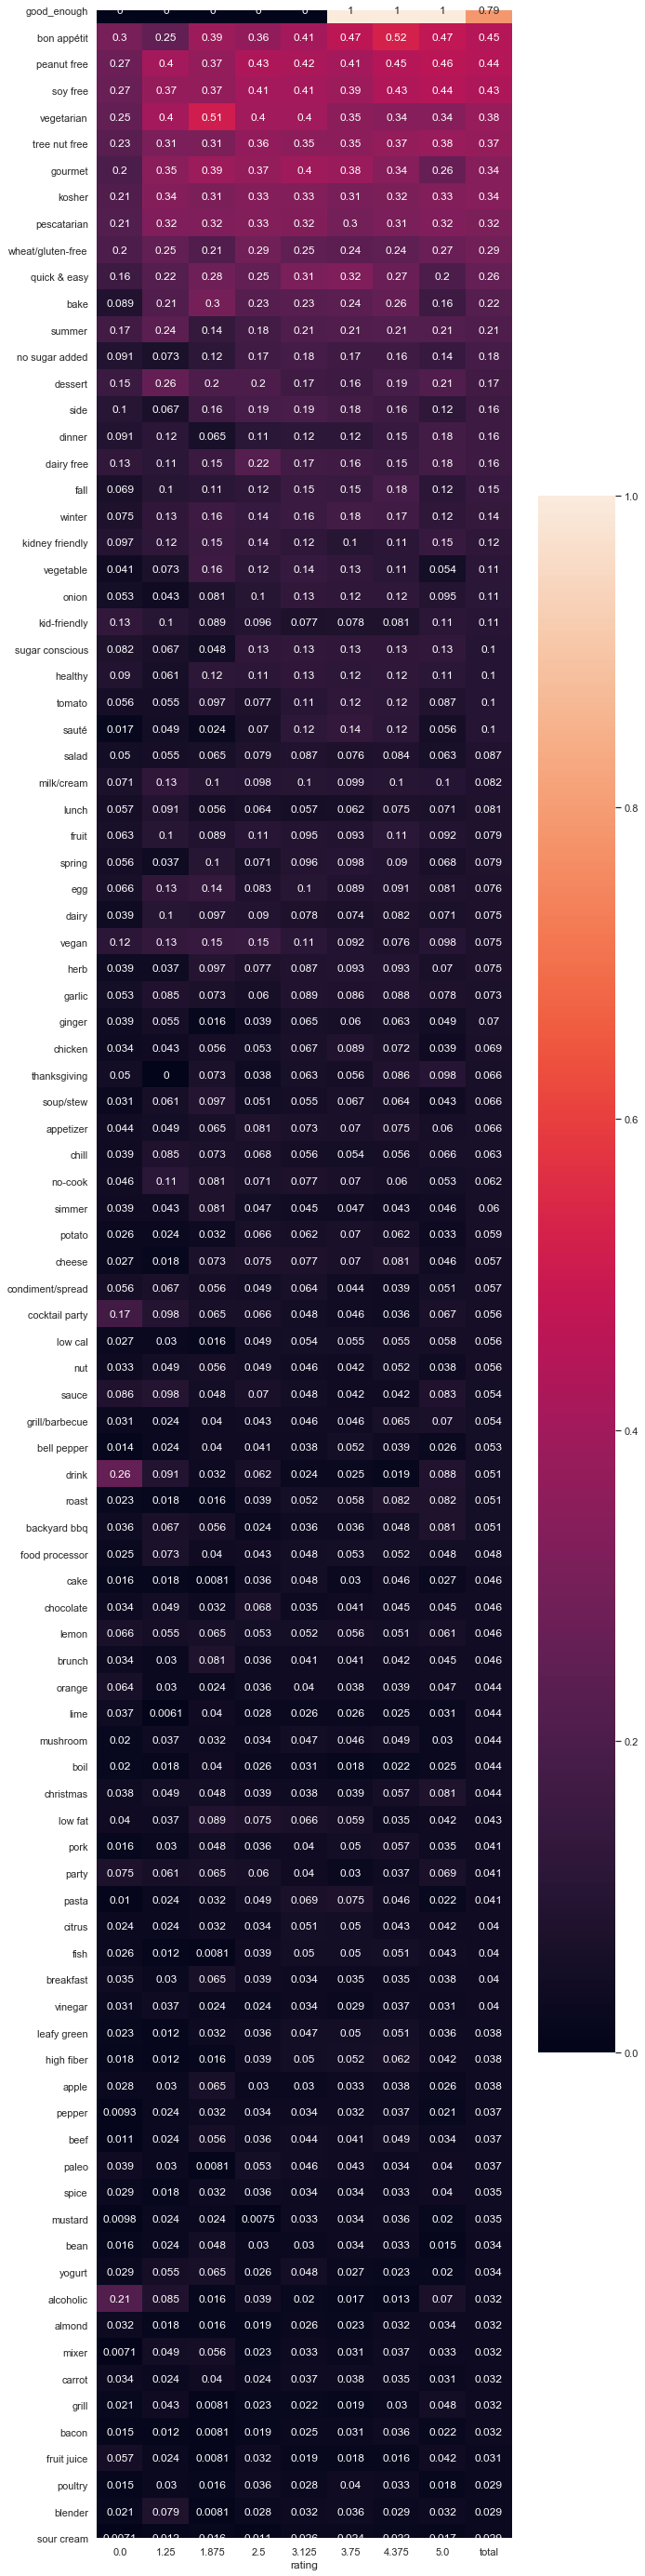

['sodium', 'calories', 'fat', 'protein', 'good_enough', 'bon appétit', 'peanut free', 'soy free', 'vegetarian', 'tree nut free', 'gourmet', 'kosher', 'pescatarian', 'wheat/gluten-free', 'quick & easy', 'bake', 'summer', 'no sugar added', 'dessert', 'side', 'dinner', 'dairy free', 'fall', 'winter', 'kidney friendly', 'vegetable', 'onion', 'kid-friendly', 'sugar conscious', 'healthy', 'tomato', 'sauté', 'salad', 'milk/cream', 'lunch', 'fruit', 'spring', 'egg', 'dairy', 'vegan', 'herb', 'garlic', 'ginger', 'chicken', 'thanksgiving', 'soup/stew', 'appetizer', 'chill', 'no-cook', 'simmer']


In [44]:
totals = raw_data.iloc[0:len(raw_data.columns)].mean()
rating_comp = raw_data.groupby(raw_data['rating']).mean().T
rating_comp['total'] = totals
rating_comp = rating_comp.sort_values(by='total', ascending = False)
rating_comp.dropna

plt.figure(figsize=(10,50))
sns.set(rc={ 'figure.facecolor':'tab:gray'})
heat_corr = rating_comp.iloc[4:100]
sns.heatmap(heat_corr, annot=True) 
plt.title("")
plt.show()
features = rating_comp.iloc[0:50].T.columns.tolist()
print(features)

After Examining the data I don't think that th

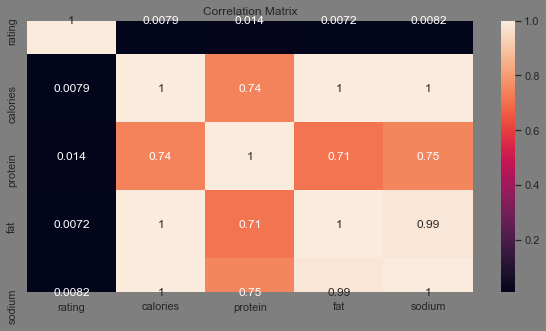

In [36]:
plt.figure(figsize=(10,5))
sns.set(rc={ 'figure.facecolor':'tab:gray'})
heat_corr = raw_data[['rating','calories','protein','fat','sodium']].corr()
sns.heatmap(heat_corr, annot=True) 
plt.title("Correlation Matrix")
plt.show()

<Figure size 432x288 with 0 Axes>

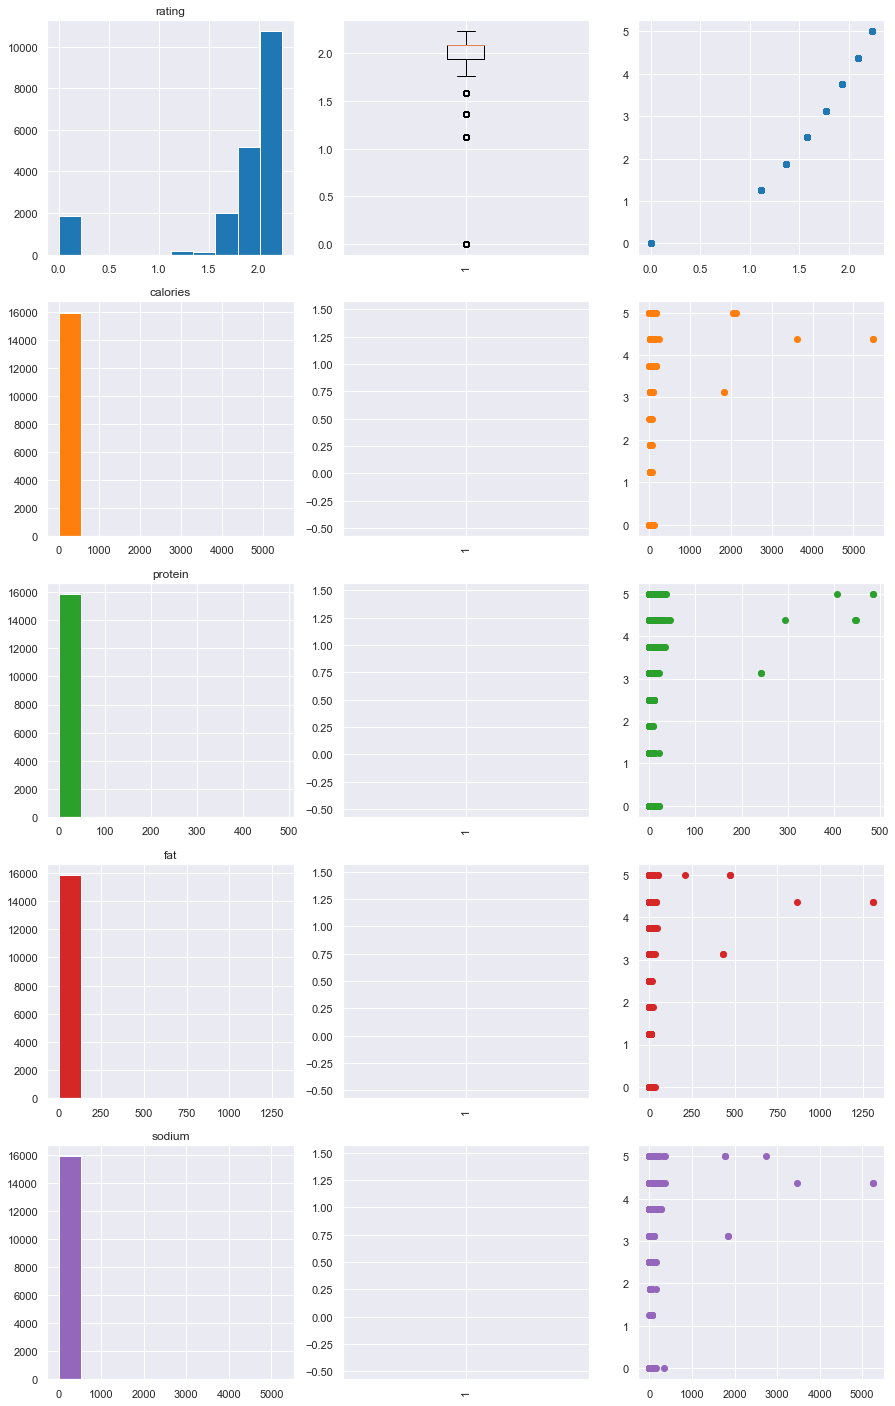

In [37]:
cont_vars =['rating','calories','protein','fat','sodium']

plt.tight_layout()

sns.set(rc={ 'figure.facecolor':'white'})

plt.figure(figsize=(15,25))
colorlist = ['tab:blue','tab:orange','tab:green','tab:red',
             'tab:purple','tab:brown','tab:pink',
             'tab:grey','tab:olive','tab:cyan']


p=0
n=0
for i, var in enumerate (cont_vars,1):

    p=i*3
    c = colorlist[n]
    if n > len(colorlist)-2:
        n=0
    else:
        n+=1
        
    plt.subplot(len(cont_vars),3,p-2)
    plt.hist(np.sqrt(raw_data[var]),color = c)
    plt.title(var)
   
    plt.subplot(len(cont_vars),3,p-1)
    plt.boxplot(np.sqrt(raw_data[var]))
    plt.xticks(rotation='vertical')
    
    plt.subplot(len(cont_vars),3,p-0)
    plt.scatter(np.sqrt(raw_data[var]),y = raw_data['rating'], color = c)
    
plt.show()    


### Convert Rating from float to catagory

In [ ]:
raw_data['rating'].unique()

In [38]:
raw_data['rating']= raw_data['rating'].astype('float64')

raw_data['good_enough'] = np.where(raw_data['rating']>= 3.75,1,0)

## Conduct Random Forrest Feature Selction  

In [39]:
#find useful variables with the random forrest classifier

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

#'grade','verification_status','last_pymnt_d','verification_status_joint','total_il_high_credit_limit'

X = raw_data.drop(columns =['rating','title'])
X = pd.get_dummies(X)
X = X.dropna(axis=1)

Y = raw_data['good_enough']


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [41]:
#from sklearn import ensemble
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(ensemble.RandomForestClassifier(n_estimators = 100))
sel.fit(X, Y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [42]:
sel.get_support()
selected_feat= X.columns[(sel.get_support())].tolist()
print(len(selected_feat))


44
['alcoholic', 'bake', 'bitters', 'bon appétit', 'cocktail', 'cocktail party', 'condiment', 'dairy free', 'dinner', 'drink', 'egg', 'fall', 'fruit', 'gin', 'gourmet', 'harpercollins', 'healthy', 'herb', 'house & garden', 'kid-friendly', 'kidney friendly', 'kosher', 'lemon', 'low fat', 'milk/cream', 'onion', 'peanut free', 'quick & easy', 'roast', 'sauce', 'sauté', 'side', 'soy free', 'spirit', 'spring', 'summer', 'tomato', 'tree nut free', 'vegan', 'vegetable', 'vegetarian', 'wheat/gluten-free', 'winter', 'good_enough']


In [50]:
# compare features from Random forrest selection to most popular features in heatmap from above 
final_features = []
for feature in features:
    if feature in selected_feat:
        final_features.append(feature)
    else:
        None

        
print(len(final_features),final_features)

30 ['good_enough', 'bon appétit', 'peanut free', 'soy free', 'vegetarian', 'tree nut free', 'gourmet', 'kosher', 'wheat/gluten-free', 'quick & easy', 'bake', 'summer', 'side', 'dinner', 'dairy free', 'fall', 'winter', 'kidney friendly', 'vegetable', 'onion', 'kid-friendly', 'healthy', 'tomato', 'sauté', 'milk/cream', 'fruit', 'spring', 'egg', 'vegan', 'herb']


### Try a Classification Model Instead

In [51]:

raw_data.dropna()

from sklearn.svm import SVC
raw_data = raw_data.dropna(axis=0)
# Instantiate our model and fit the data.
X = raw_data[final_features]
Y = raw_data['good_enough']
svm = SVC(kernel = 'linear')
svm.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [52]:
svm.score(X, Y)

1.0

In [53]:
from sklearn.model_selection import cross_val_score

cross_val_score(svm,X, Y, cv = 10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])